<a href="https://colab.research.google.com/github/rajathithan/google-colab/blob/main/Tensorflow_multi_class_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multi class object classification using tensorflow using feed forward Nerural network



In [2]:
# Import the tensorflow libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import fashion_mnist as fm
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# Train and test images split
(train_images, train_labels),(test_images, test_labels) = fm.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
# No of labels or classes
classes = np.unique(train_labels)
print(len(classes))

10


In [5]:
# Class Names
labelMap = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
print(len(labelMap))

10


(60000, 28, 28)


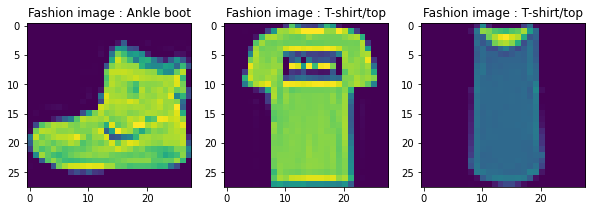

In [30]:
plt.figure(figsize=[10,5])
plt.subplot(131)
plt.imshow(train_images[0,:,:])
plt.title("Fashion image : {}".format(labelMap[train_labels[0]]));
plt.subplot(132)
plt.imshow(train_images[1,:,:])
plt.title("Fashion image : {}".format(labelMap[train_labels[1]]));
plt.subplot(133)
plt.imshow(train_images[2,:,:])
plt.title("Fashion image : {}".format(labelMap[train_labels[2]]));
print(train_images.shape)

In [7]:
# Process the data
# Convert a matrix array of dimension 28 X 28 to 784 
required_dim = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], required_dim)
test_data = test_images.reshape(test_images.shape[0], required_dim)
print(train_data.shape)
print(test_data.shape)

(60000, 784)
(10000, 784)


In [8]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
 
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

In [9]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  9
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [10]:
model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_shape=(required_dim,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(len(classes), activation='softmax'))
model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model_reg.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [11]:
# To see detail output, change verbose to True
output = model_reg.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=True, 
                            validation_data=(test_data, test_labels_one_hot))

Epoch 1/20
235/235 [==============================] - 1s 4ms/step - loss: 0.6767 - accuracy: 0.7542 - val_loss: 0.4870 - val_accuracy: 0.8257
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.4693 - accuracy: 0.8293 - val_loss: 0.4646 - val_accuracy: 0.8284
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.4281 - accuracy: 0.8439 - val_loss: 0.4277 - val_accuracy: 0.8409
Epoch 4/20
235/235 [==============================] - 1s 4ms/step - loss: 0.4012 - accuracy: 0.8559 - val_loss: 0.4661 - val_accuracy: 0.8272
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3852 - accuracy: 0.8614 - val_loss: 0.4109 - val_accuracy: 0.8505
Epoch 6/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3778 - accuracy: 0.8641 - val_loss: 0.3857 - val_accuracy: 0.8666
Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3661 - accuracy: 0.8688 - val_loss: 0.4208 - val_accuracy: 0.8605
Epoch 

Text(0.5, 1.0, 'Accuracy Curves')

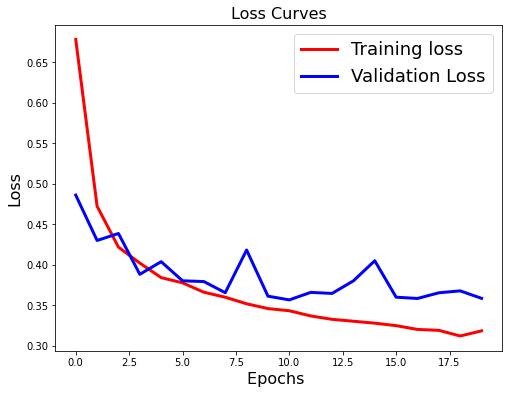

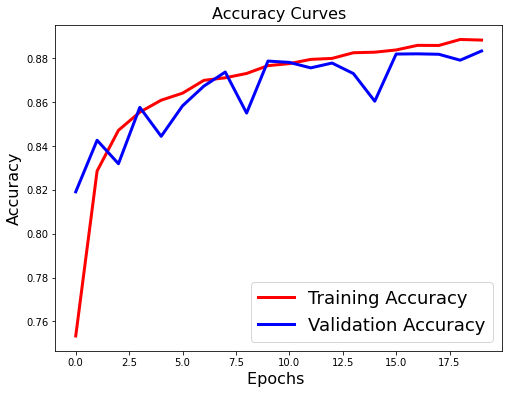

In [66]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(output.history['loss'],'r',linewidth=3.0)
plt.plot(output.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(output.history['accuracy'],'r',linewidth=3.0)
plt.plot(output.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [32]:
model_reg.predict(test_data[[14],:])[0]

array([2.5929295e-04, 1.2170386e-08, 1.2841433e-01, 7.3407500e-05,
       8.0939394e-01, 1.3019701e-10, 6.1402831e-02, 5.0071974e-11,
       4.5618895e-04, 3.0704114e-10], dtype=float32)

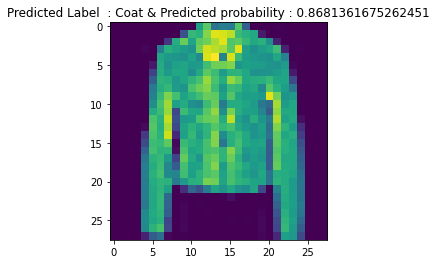

In [37]:
plt.imshow(test_images[10,:,:])
label = np.argmax(model_reg.predict(test_data[[10],:]), axis=-1)[0]
prob = model_reg.predict(test_data[[10],:])[0]
labelProb = prob[label]
plt.title("Predicted Label  : {} & Predicted probability : {}".format(labelMap[label], labelProb ));